In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

loan =pd.read_csv("loan.csv")

display(loan.head())
display(loan.info())

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,1.0,Urban,Y


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(3), int64(1), object(8)
memory usage: 57.7+ KB


None

### Data Exploration & Preprocessing

In [2]:
loan = loan.drop("Loan_ID",axis=1)

## Standard scaling of the continuous columns only

for i in ["ApplicantIncome","CoapplicantIncome","LoanAmount"]:
    loan[i] = (loan[i] - loan[i].mean())/loan[i].std()

### Outlier Detection using z-score

OutlierRows = loan[(loan["LoanAmount"]>3) |(loan["LoanAmount"]<-3) |
                   (loan["ApplicantIncome"]>3)|(loan["ApplicantIncome"]<-3)|
                   (loan["CoapplicantIncome"]>3)|(loan["CoapplicantIncome"]<-3)]

print("% of Outlier rows in the dataset is " + str(len(OutlierRows)/len(loan)*100)+"\n")
loan_OutlierFree = loan.drop(OutlierRows.index,axis=0)

### Missing Value Detection & treatment

MV = loan_OutlierFree.isna().sum()
print("% of Missing values by columns are")
print(MV[MV>0]/len(loan_OutlierFree)*100)

for i in MV[MV>0].index:
    
    if (i == "LoanAmount"):
        loan_OutlierFree[i].fillna(loan_OutlierFree[i].median(),inplace=True)
    else:
        loan_OutlierFree[i].fillna(loan_OutlierFree[i].mode()[0],inplace=True)

loan_noOutlierNoMV = loan_OutlierFree

#Converting all binary categorical columns into label encoded columns

loan_noOutlierNoMV["Loan_Status"].replace(['Y','N'],[1,0],inplace = True)
loan_noOutlierNoMV["Gender"].replace(['Male','Female'],[1,0],inplace = True)
loan_noOutlierNoMV["Married"].replace(['Yes','No'],[1,0],inplace = True)
loan_noOutlierNoMV["Education"].replace(['Graduate','Not Graduate'],[1,0],inplace = True)
loan_noOutlierNoMV["Self_Employed"].replace(['Yes','No'],[1,0],inplace = True)

#Converting all >2 class categorical columns into one-hot encoded columns

loan_new = pd.get_dummies(loan_noOutlierNoMV)

loan_new.info()
loan_new.head()

% of Outlier rows in the dataset is 3.908794788273615

% of Missing values by columns are
Gender            1.864407
Married           0.508475
Dependents        2.542373
Self_Employed     4.915254
LoanAmount        3.728814
Credit_History    7.966102
dtype: float64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 590 entries, 0 to 613
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Gender                   590 non-null    int64  
 1   Married                  590 non-null    int64  
 2   Education                590 non-null    int64  
 3   Self_Employed            590 non-null    int64  
 4   ApplicantIncome          590 non-null    float64
 5   CoapplicantIncome        590 non-null    float64
 6   LoanAmount               590 non-null    float64
 7   Credit_History           590 non-null    float64
 8   Loan_Status              590 non-null    int64  
 9   Dependents_0             590 

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,Loan_Status,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,1,0,1,0,0.072931,-0.554036,-0.250179,1.0,1,1,0,0,0,0,0,1
1,1,1,1,0,-0.134302,-0.038700,-0.215127,1.0,0,0,1,0,0,1,0,0
2,1,1,1,1,-0.393427,-0.554036,-0.939534,1.0,1,1,0,0,0,0,0,1
3,1,1,0,0,-0.461686,0.251774,-0.308599,1.0,1,1,0,0,0,0,0,1
4,1,0,1,0,0.097649,-0.554036,-0.063236,1.0,1,1,0,0,0,0,0,1


### Data Splitting

In [4]:
X = loan_new.drop("Loan_Status",axis=1)
y = loan_new["Loan_Status"]

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.22,random_state=111)
len(X_train),len(X_test)

(460, 130)

### Apply Decision Tree

In [5]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

dt = DecisionTreeClassifier(random_state = 45)

#fit the model
dt = dt.fit(X_train,y_train)

#use the fitted model to predict
y_pred = dt.predict(X_test)

print("Model Performance metrics are as below :-\n")
print("Accuracy is "+str(accuracy_score(y_test,y_pred)))
print("Precision is "+str(precision_score(y_test,y_pred)))
print("Recall is "+str(recall_score(y_test,y_pred)))
print("F1-Score is "+str(f1_score(y_test,y_pred)))

Model Performance metrics are as below :-

Accuracy is 0.7230769230769231
Precision is 0.7752808988764045
Recall is 0.8117647058823529
F1-Score is 0.793103448275862


## Visualize the Classification Tree

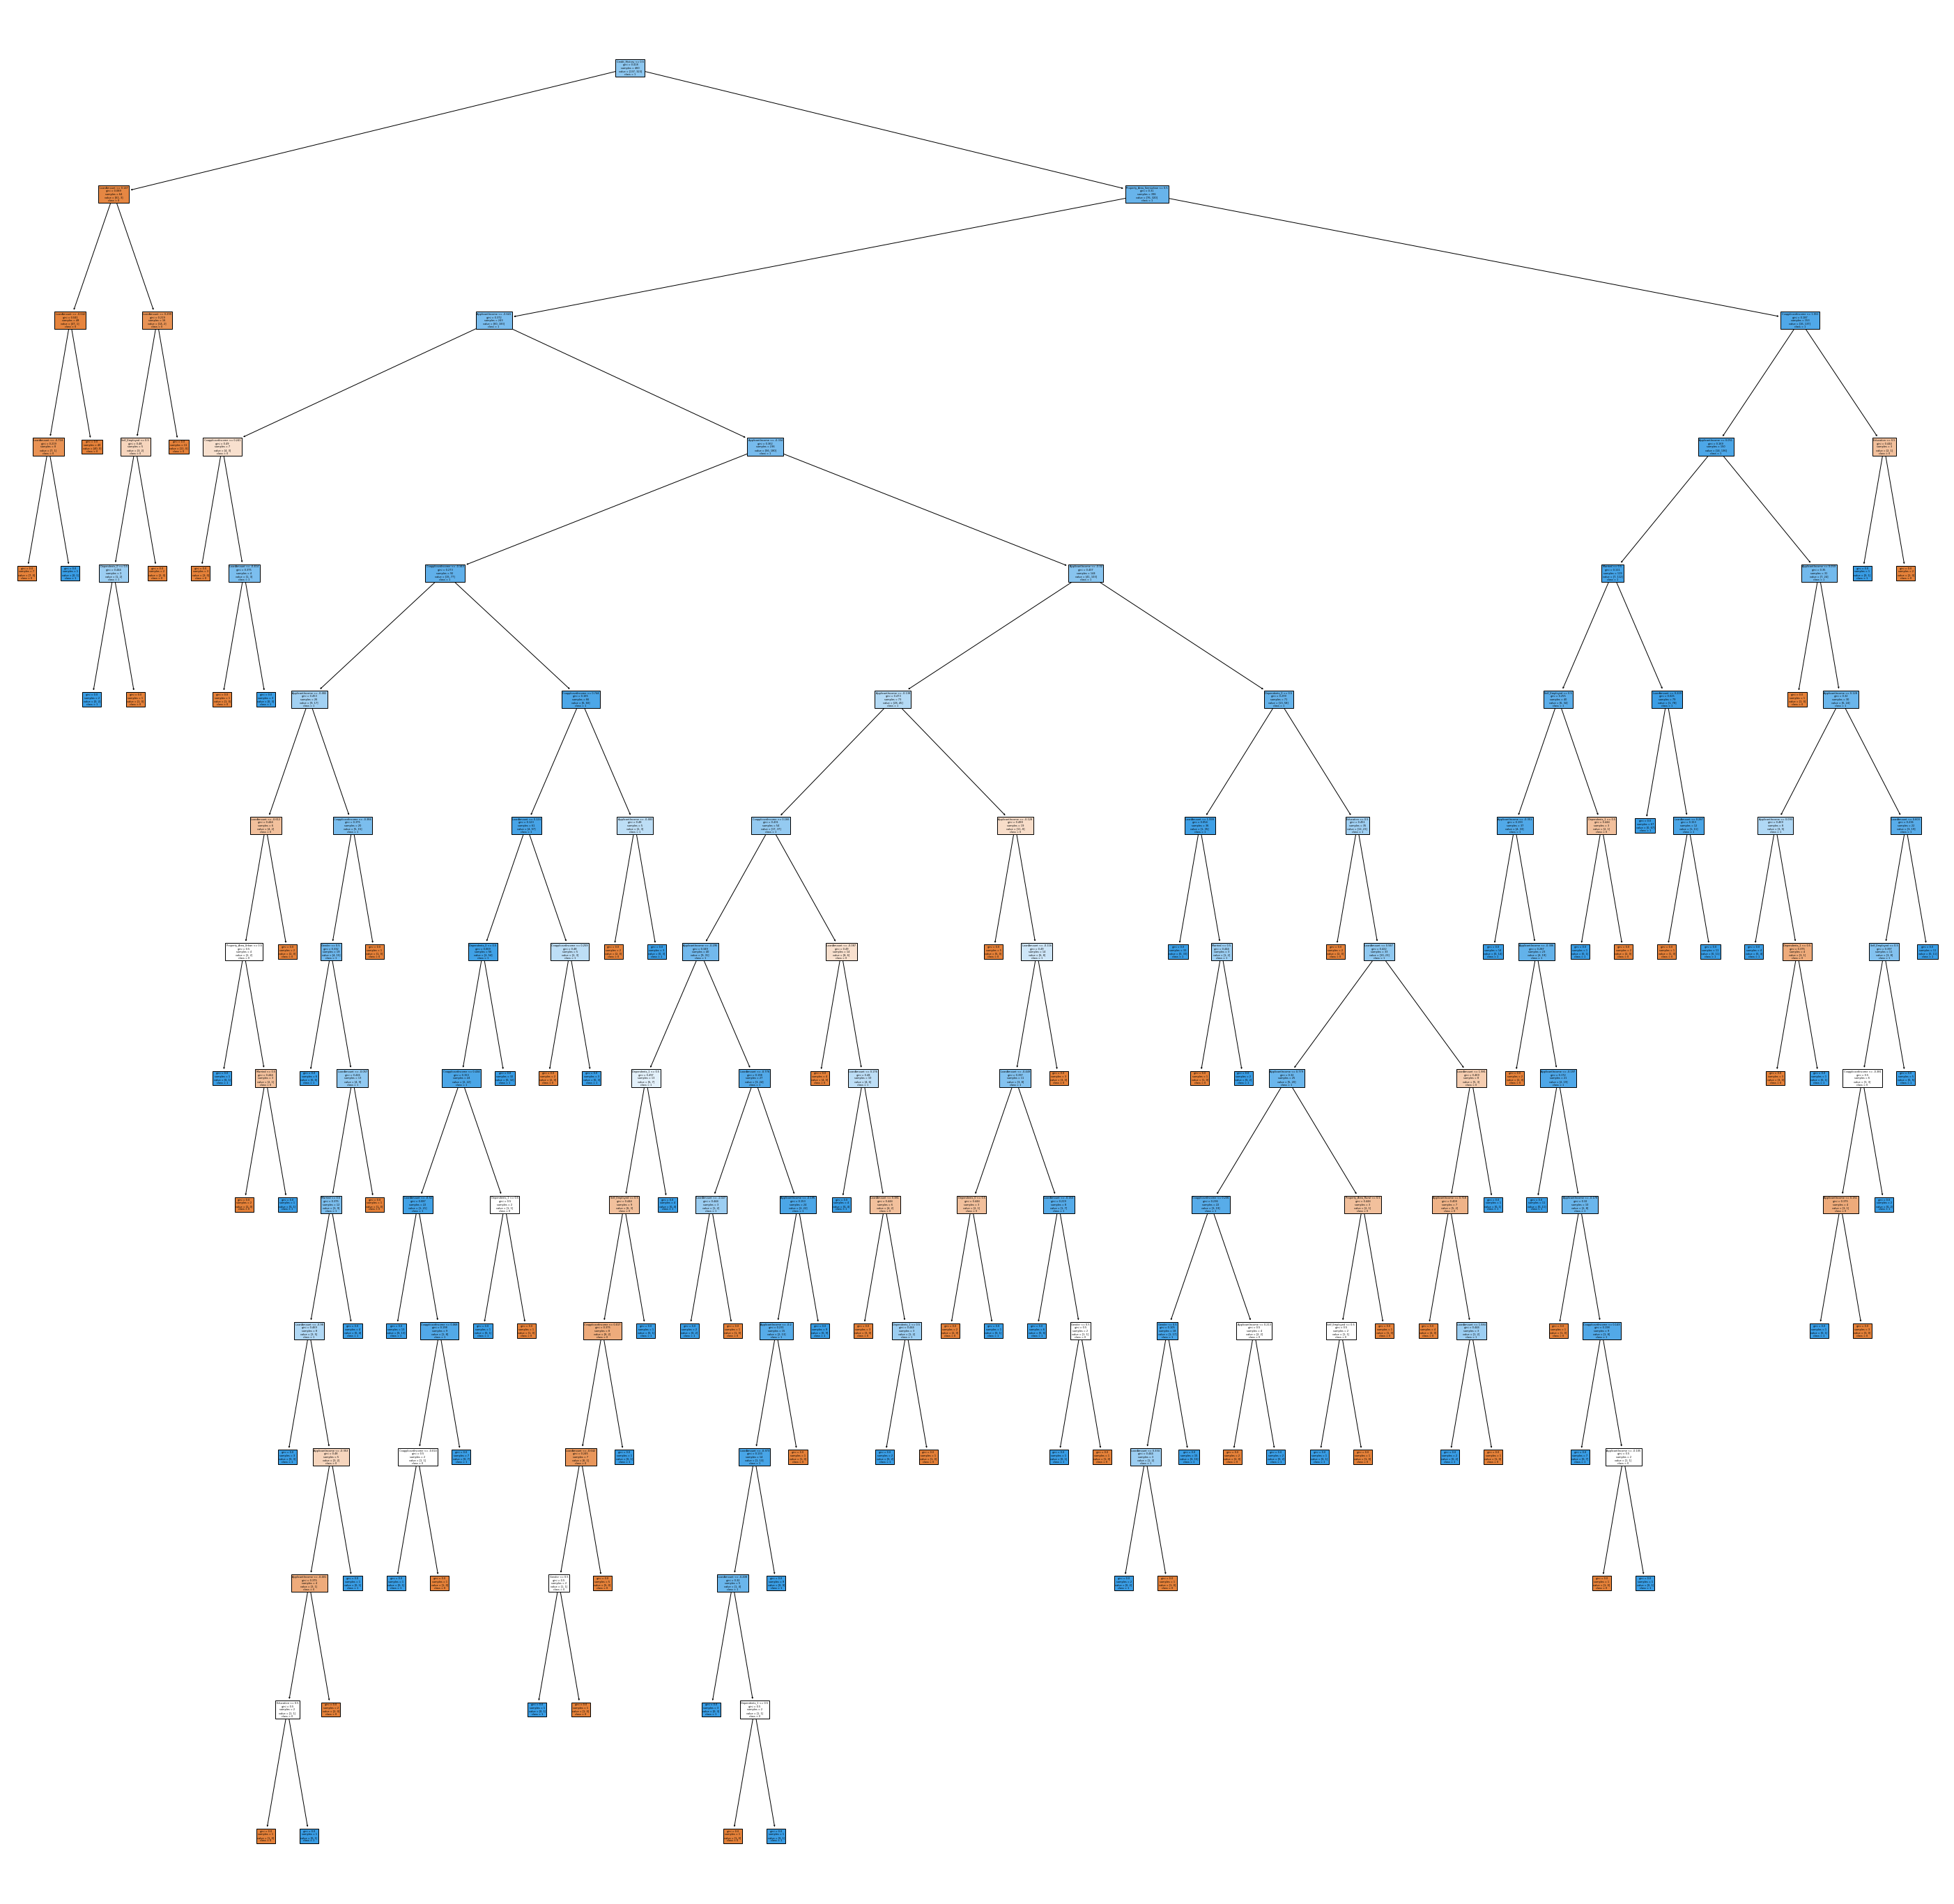

In [6]:
from sklearn import tree

plt.figure(figsize = (50,50))
tree.plot_tree(dt, 
                   feature_names = list(X.columns), 
                   class_names = ['0','1'],
                   filled = True);

In [7]:
text_representation = tree.export_text(dt)
print(text_representation)

|--- feature_7 <= 0.50
|   |--- feature_6 <= 0.15
|   |   |--- feature_6 <= -0.64
|   |   |   |--- feature_6 <= -0.72
|   |   |   |   |--- class: 0
|   |   |   |--- feature_6 >  -0.72
|   |   |   |   |--- class: 1
|   |   |--- feature_6 >  -0.64
|   |   |   |--- class: 0
|   |--- feature_6 >  0.15
|   |   |--- feature_6 <= 0.30
|   |   |   |--- feature_3 <= 0.50
|   |   |   |   |--- feature_8 <= 0.50
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_8 >  0.50
|   |   |   |   |   |--- class: 0
|   |   |   |--- feature_3 >  0.50
|   |   |   |   |--- class: 0
|   |   |--- feature_6 >  0.30
|   |   |   |--- class: 0
|--- feature_7 >  0.50
|   |--- feature_13 <= 0.50
|   |   |--- feature_4 <= -0.64
|   |   |   |--- feature_5 <= 0.24
|   |   |   |   |--- class: 0
|   |   |   |--- feature_5 >  0.24
|   |   |   |   |--- feature_6 <= -0.41
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_6 >  -0.41
|   |   |   |   |   |--- class: 1
|   |   |--- feature_4 >  -0.64
|   

## Parameter Tuning

In [8]:
criterion = ['gini','entropy']
max_depth = np.arange(1,15).tolist()[0::2]
# min_samples_split = np.arange(2,11).tolist()[0::2]
max_leaf_nodes = np.arange(3,26).tolist()[0::2]

prec = []
rec = []
acc = []

PerfData = pd.DataFrame(columns=['Criterion','Max Tree Depth','Max Leaf Nodes','Precision','Recall','Accuracy','F1-Score'])
for c in criterion:
    for md in max_depth:
        for mln in max_leaf_nodes:
            dt = DecisionTreeClassifier(criterion = c, max_depth = md, max_leaf_nodes = mln, random_state = 45)
            
            dt = dt.fit(X_train,y_train)
            y_pred = dt.predict(X_test)
            
            row = [[c, md, mln, precision_score(y_test,y_pred), recall_score(y_test,y_pred), accuracy_score(y_test,y_pred),f1_score(y_test,y_pred)]]
            
            PerfData = PerfData.append(
                pd.DataFrame(row, columns=['Criterion','Max Tree Depth','Max Leaf Nodes','Precision','Recall','Accuracy','F1-Score']),
                                   ignore_index=True)

display(PerfData[(PerfData['F1-Score'] == max(PerfData['F1-Score']))])

,Criterion,Max Tree Depth,Max Lead Nodes,Precision,Recall,Accuracy,F1-Score
0,gini,1,3,0.759259,0.964706,0.776923,0.849741
1,gini,1,5,0.759259,0.964706,0.776923,0.849741
2,gini,1,7,0.759259,0.964706,0.776923,0.849741
3,gini,1,9,0.759259,0.964706,0.776923,0.849741
4,gini,1,11,0.759259,0.964706,0.776923,0.849741
5,gini,1,13,0.759259,0.964706,0.776923,0.849741
6,gini,1,15,0.759259,0.964706,0.776923,0.849741
7,gini,1,17,0.759259,0.964706,0.776923,0.849741
8,gini,1,19,0.759259,0.964706,0.776923,0.849741
9,gini,1,21,0.759259,0.964706,0.776923,0.849741


In [ ]:
DecisionTreeClassifier(criterion = 'entropy', max_depth = 7, max_leaf_nodes = 5, random_state = 45, min_samples_split = 4)